In [1]:
import pandas as pd
from glob import glob
pd.options.display.float_format = '{:,.6f}'.format

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (10,7)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10, forward=True)
fig.set_dpi(100)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams["figure.figsize"] = (20,10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.rcParams.update(params)

<Figure size 1500x1000 with 0 Axes>

In [3]:
class Tex:
    def __init__(self, path):
        self.raw_df=pd.read_pickle(path)
        
        self.automls=['Baseline', 
                      'MLJAR',
                      'FLAML',
                      'AutoSKLearn', 
                      'H2O',  
                       'TPOT',
                      'AutoGluon',
                      'RSS']
        
        self.time_budgets=[30,
                           60,
                           120,
                           180,
                           300]
        
        assert(self.check())
        
    def __str__(self):
        out='\n'
        for automl in self.automls:
            out+=f'{df[df.automl==automl].head(1).to_markdown()}\n'
        return out
    
    def check(self):
        df=self.raw_df
        for a in df.automl.unique():
            assert(a in self.automls)
        assert(len(df.automl.unique()==8))
        assert(len(df.project.unique())==31)
        assert(len(df.seed.unique())==10)
        assert(len(df.time_budget.unique()==5))
        return True
    
    def get_overall(self):
        df=self.raw_df.copy()
        temp_data={}
        for automl in self.automls:
            filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
            row=[]
            for i in filter_df.index:
                score=filter_df.loc[i].score['mean']
                std=filter_df.loc[i].score['std']
                row.append(f' {score.round(4)} $\pm$ {std.round(2)} ')
            temp_data[f'{automl}']=row
        out_df=pd.DataFrame.from_dict(temp_data)
        out_df.index=self.time_budgets
        tex= self._get_tex(out_df)
        return tex, out_df
    
    def _get_tex(self,df):
        return str(df.to_latex().replace('\$',
                                         '$').replace('\\textbackslash ',
                                                      '\\').replace('\{',
                                                                    '{').replace('\}',
                                                                                 '}'))
    
    def save_time_budget_figure(self):
        df=self.raw_df
        ax=None
        axs=[]
        for time_budget in reversed(sorted(df.time_budget.unique())):
            
            df_draw=df[(df.time_budget==time_budget)][['automl',
                                                       'project',
                                                       'score']].groupby(['project',
                                                                          'automl']).agg(['mean'])
            
            ax=df_draw.unstack().plot(ax=ax, rot=45, style=['r*-','b--','y^-', 
                                                            'g*', 'y*','r--',
                                                            'bo-','g:'], linewidth=2.0)
            ax.set_title(f'Time Budget:{time_budget}')
            ax.set_xlabel('Dataset')
            ax.set_ylabel('$R^2$')
            legends=[_[1] for _ in df_draw.index ]
            plt.legend(legends,fontsize=20)
            plt.grid(visible=True, which='major', color='0.75', linestyle='-')
            plt.savefig(f'fig_a_{time_budget}.jpg')
            plt.show()
            axs.append(ax)
            ax=None
        return axs  

In [4]:
input_path='re_v2_all_files.pkl'
tex=Tex(input_path)
tex_code, tex_df = tex.get_overall()
df=tex.raw_df

/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised th

In [5]:
tex.raw_df.head(5)

,automl,project,seed,time_budget,score
0,AutoGluon,361072,219,30,0.848995
1,AutoGluon,361072,219,60,0.986669
2,AutoGluon,361072,219,120,0.986655
3,AutoGluon,361072,219,180,0.987282
4,AutoGluon,361072,219,300,0.987274


In [6]:
print(tex)


|      | automl   |   project |   seed |   time_budget |    score |
|-----:|:---------|----------:|-------:|--------------:|---------:|
| 5933 | Baseline |    361072 |    101 |            30 | 0.981988 |
|      | automl   |   project |   seed |   time_budget |    score |
|-----:|:---------|----------:|-------:|--------------:|---------:|
| 4388 | MLJAR    |    361072 |    101 |            30 | 0.984739 |
|      | automl   |   project |   seed |   time_budget |    score |
|-----:|:---------|----------:|-------:|--------------:|---------:|
| 7483 | FLAML    |    361072 |    194 |            30 | 0.986745 |
|      | automl      |   project |   seed |   time_budget |    score |
|-----:|:------------|----------:|-------:|--------------:|---------:|
| 1550 | AutoSKLearn |    361072 |    168 |            30 | 0.984617 |
|      | automl   |   project |   seed |   time_budget |   score |
|-----:|:---------|----------:|-------:|--------------:|--------:|
| 2997 | H2O      |    361072 |    101 |

In [7]:
_, text_df = tex.get_overall()
text_df

/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_1006811/1439304274.py:42: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised th

,Baseline,MLJAR,FLAML,AutoSKLearn,H2O,TPOT,AutoGluon,RSS
30,0.7601 $\pm$ 0.28,0.7662 $\pm$ 0.28,0.8069 $\pm$ 0.21,0.6607 $\pm$ 0.35,0.7885 $\pm$ 0.22,0.6597 $\pm$ 0.33,0.7047 $\pm$ 0.32,0.8222 $\pm$ 0.21
60,0.7663 $\pm$ 0.27,0.7764 $\pm$ 0.27,0.8152 $\pm$ 0.2,0.7179 $\pm$ 0.3,0.8004 $\pm$ 0.21,0.689 $\pm$ 0.32,0.7341 $\pm$ 0.3,0.8239 $\pm$ 0.2
120,0.7629 $\pm$ 0.28,0.7691 $\pm$ 0.28,0.8177 $\pm$ 0.2,0.7518 $\pm$ 0.27,0.8039 $\pm$ 0.22,0.7506 $\pm$ 0.27,0.7751 $\pm$ 0.27,0.8242 $\pm$ 0.2
180,0.7598 $\pm$ 0.28,0.7365 $\pm$ 0.28,0.819 $\pm$ 0.2,0.7819 $\pm$ 0.24,0.8054 $\pm$ 0.22,0.7618 $\pm$ 0.26,0.777 $\pm$ 0.27,0.8243 $\pm$ 0.2
300,0.761 $\pm$ 0.28,0.7277 $\pm$ 0.28,0.8217 $\pm$ 0.2,0.7923 $\pm$ 0.23,0.8131 $\pm$ 0.21,0.7748 $\pm$ 0.25,0.7716 $\pm$ 0.28,0.8262 $\pm$ 0.2


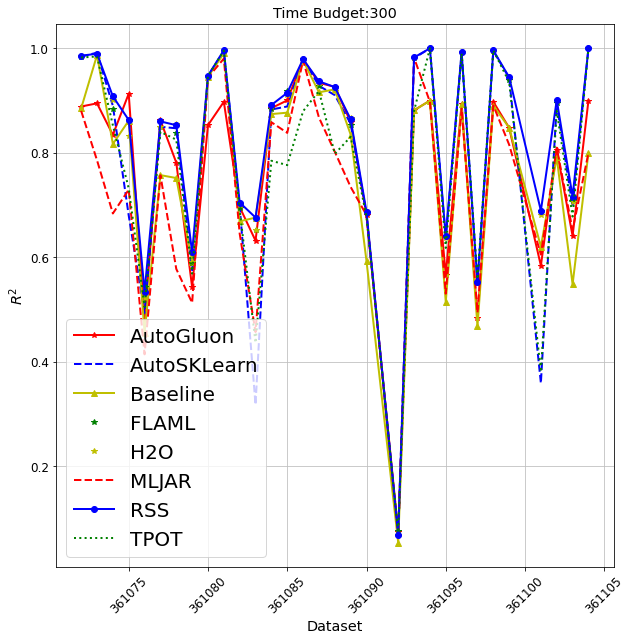

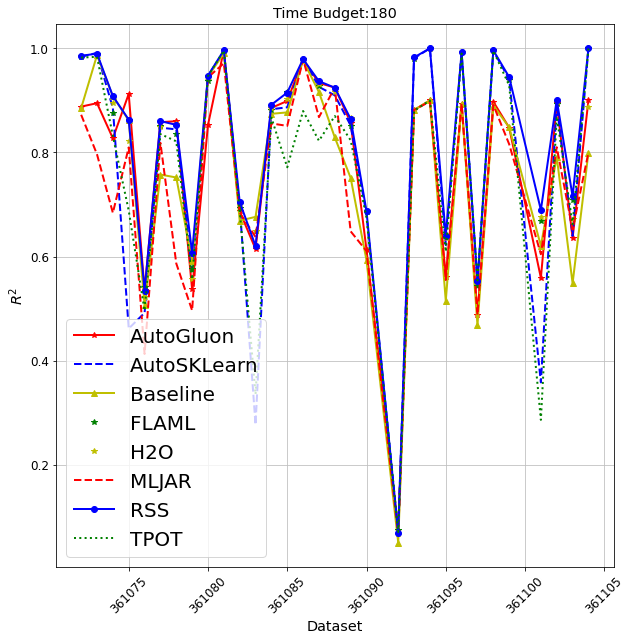

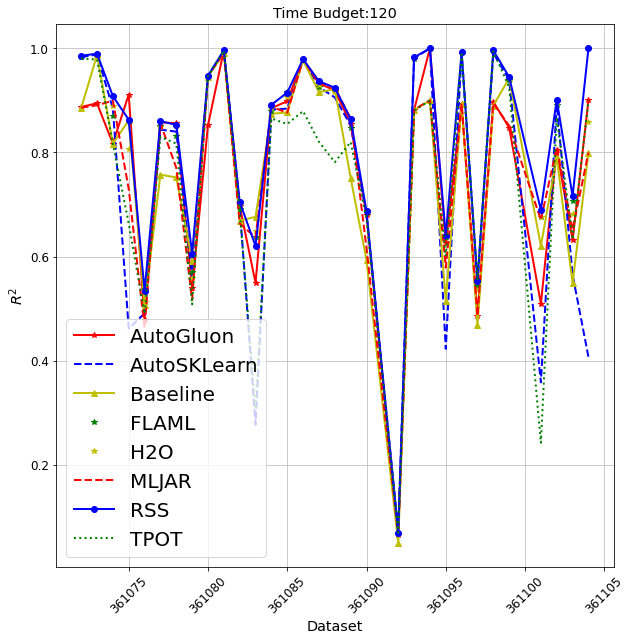

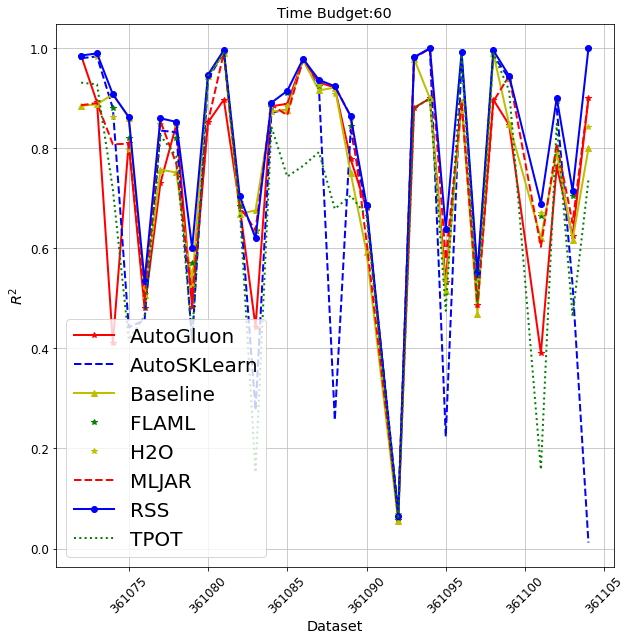

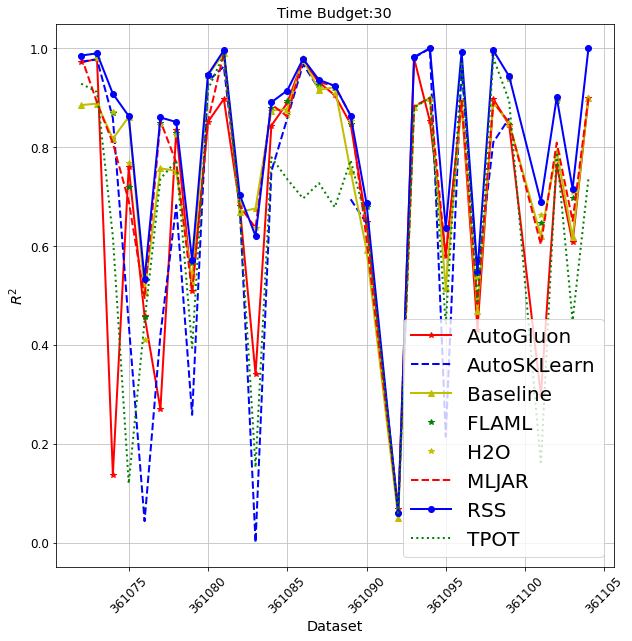

[<AxesSubplot:title={'center':'Time Budget:300'}, xlabel='Dataset', ylabel='$R^2$'>,
 <AxesSubplot:title={'center':'Time Budget:180'}, xlabel='Dataset', ylabel='$R^2$'>,
 <AxesSubplot:title={'center':'Time Budget:120'}, xlabel='Dataset', ylabel='$R^2$'>,
 <AxesSubplot:title={'center':'Time Budget:60'}, xlabel='Dataset', ylabel='$R^2$'>,
 <AxesSubplot:title={'center':'Time Budget:30'}, xlabel='Dataset', ylabel='$R^2$'>]

In [8]:

tex.save_time_budget_figure()